In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [3]:
# 1. Impact of Outliers on Central Tendency Measures
data = [10, 12, 14, 15, 18, 19, 20, 22, 24, 100]  # Outlier at 100
print("Mean with outlier:", np.mean(data))
print("Median with outlier:", np.median(data))
print("Mode with outlier:", stats.mode(data, keepdims=True).mode[0])

# Removing outlier
data_no_outlier = [10, 12, 14, 15, 18, 19, 20, 22, 24]
print("Mean without outlier:", np.mean(data_no_outlier))
print("Median without outlier:", np.median(data_no_outlier))
print("Mode without outlier:", stats.mode(data_no_outlier, keepdims=True).mode[0])

Mean with outlier: 25.4
Median with outlier: 18.5
Mode with outlier: 10
Mean without outlier: 17.11111111111111
Median without outlier: 18.0
Mode without outlier: 10


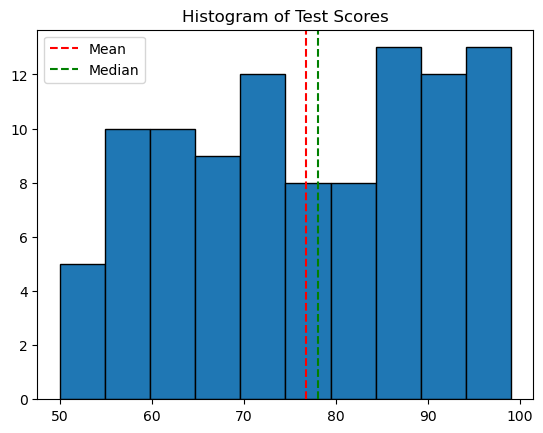

In [5]:
# 2. Measures of Central Tendency with Test Scores
test_scores = np.random.randint(50, 100, 100)
plt.hist(test_scores, bins=10, edgecolor='black')
plt.axvline(np.mean(test_scores), color='r', linestyle='dashed', label='Mean')
plt.axvline(np.median(test_scores), color='g', linestyle='dashed', label='Median')
plt.legend()
plt.title("Histogram of Test Scores")
plt.show()

Range: 89
IQR: 53.25
Variance: 858.1632653061224
Standard Deviation: 29.29442379201411


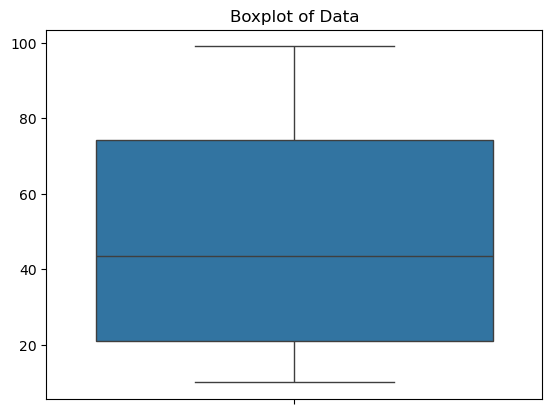

In [7]:
# 3. Measures of Dispersion
data = np.random.randint(10, 100, 50)
print("Range:", np.ptp(data))
print("IQR:", np.percentile(data, 75) - np.percentile(data, 25))
print("Variance:", np.var(data, ddof=1))
print("Standard Deviation:", np.std(data, ddof=1))

# Boxplot
sns.boxplot(data)
plt.title("Boxplot of Data")
plt.show()

In [9]:
# 4. Paired T-Test
before = np.random.randint(50, 70, 20)
after = before + np.random.randint(5, 15, 20)
t_stat, p_value = stats.ttest_rel(before, after)
print("T-statistic:", t_stat, "P-value:", p_value)

T-statistic: -14.781745499094482 P-value: 7.120828572169546e-12


In [11]:
# 5. Type I and Type II Errors
def hypothesis_test(alpha=0.05):
    null_true = np.random.rand(100) > 0.5  # Simulate null hypothesis
    test_result = np.random.rand(100) < alpha  # Simulate test decision
    type_1_error = sum(null_true & test_result)
    type_2_error = sum(~null_true & ~test_result)
    print("Type I Errors:", type_1_error, "Type II Errors:", type_2_error)
hypothesis_test()

Type I Errors: 5 Type II Errors: 55


Predicted Salary for 5 years experience: 4981.818181818182


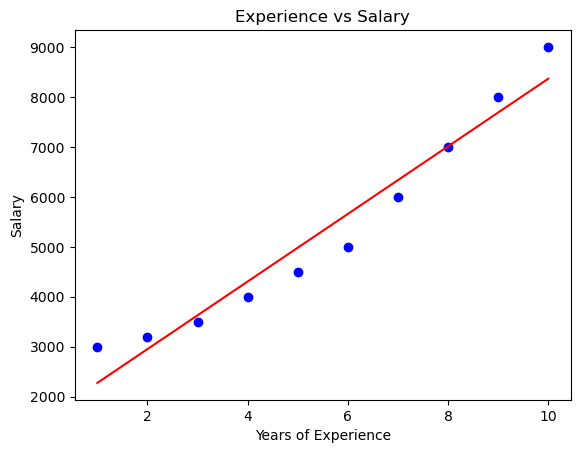

In [13]:
# 6. Regression Analysis
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([3000, 3200, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000])
model = LinearRegression()
model.fit(X, y)
predicted_salary = model.predict([[5]])
print("Predicted Salary for 5 years experience:", predicted_salary[0])

# Scatterplot with Regression Line
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

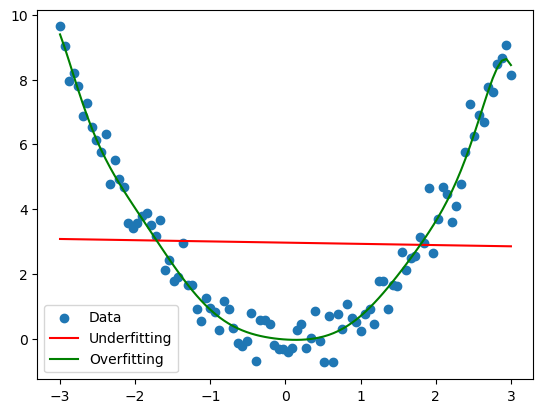

In [15]:
# 7. Underfitting and Overfitting
X_poly = np.linspace(-3, 3, 100)
y_poly = X_poly**2 + np.random.normal(0, 0.5, size=X_poly.shape)

plt.scatter(X_poly, y_poly, label='Data')
model_underfit = LinearRegression()
model_underfit.fit(X_poly.reshape(-1, 1), y_poly)
plt.plot(X_poly, model_underfit.predict(X_poly.reshape(-1, 1)), label='Underfitting', color='red')

model_overfit = make_pipeline(PolynomialFeatures(10), LinearRegression())
model_overfit.fit(X_poly.reshape(-1, 1), y_poly)
plt.plot(X_poly, model_overfit.predict(X_poly.reshape(-1, 1)), label='Overfitting', color='green')

plt.legend()
plt.show()

Linear Regression MSE: 23.153163150938777
Polynomial Regression MSE: 23.047312661399623
Lasso Regression MSE: 23.15461529615331


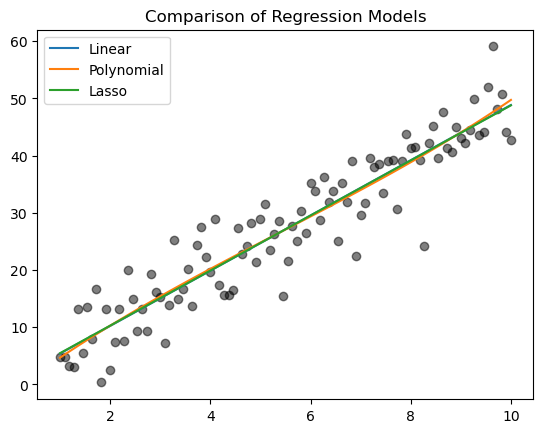

In [17]:
# 8. Comparing Regression Models
X = np.linspace(1, 10, 100).reshape(-1, 1)
y = 5 * X.flatten() + np.random.normal(0, 5, size=100)

models = {"Linear": LinearRegression(),
          "Polynomial": make_pipeline(PolynomialFeatures(3), LinearRegression()),
          "Lasso": Lasso(alpha=0.1)}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f"{name} Regression MSE: {mean_squared_error(y, y_pred)}")
    plt.plot(X, y_pred, label=name)

plt.scatter(X, y, color='black', alpha=0.5)
plt.legend()
plt.title("Comparison of Regression Models")
plt.show()

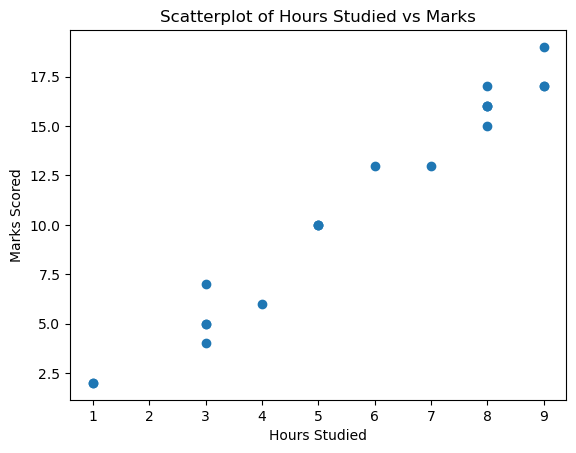

Pearson Correlation Coefficient: 0.9866530960120165


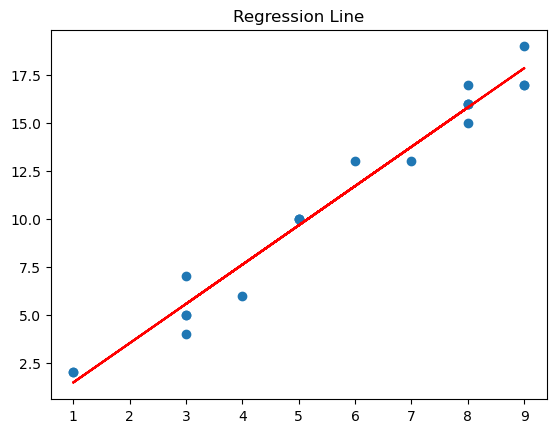

In [19]:
# 9. Correlation and Regression
X = np.random.randint(1, 10, 20)
y = 2 * X + np.random.randint(-2, 2, 20)
plt.scatter(X, y)
plt.title("Scatterplot of Hours Studied vs Marks")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.show()

corr_coef = np.corrcoef(X, y)[0, 1]
print("Pearson Correlation Coefficient:", corr_coef)
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)
plt.scatter(X, y)
plt.plot(X, model.predict(X.reshape(-1, 1)), color='red')
plt.title("Regression Line")
plt.show()